In [ ]:
# Importar libreria pandas
import pandas as pd

In [ ]:
# Leer el archivo CSV
data = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [ ]:
# Filtrar los datos para las columnas relevantes y los países específicos
data = data[['location', 'date', 'new_cases_smoothed']]

# Convertir la columna 'date' a tipo datetime
data['date'] = pd.to_datetime(data['date'])

# Filtrar por los países deseados
countries = ['Argentina', 'Bolivia', 'Chile', 'Peru', 'Colombia', 'Ecuador']
data = data[data['location'].isin(countries)]

# Eliminar valores NaN y 0.0 en la columna 'new_cases_smoothed'
data = data.dropna(subset=['new_cases_smoothed'])
data = data[data['new_cases_smoothed'] != 0.0]

# Extraer el año de la columna 'date'
data['year'] = data['date'].dt.year

# Filtrar por los años 2020 a 2024
data = data[data['year'].isin([2020, 2021, 2022, 2023, 2024])]

# Agrupar por año y país, y sumar los casos nuevos
pivot_table = data.groupby(['year', 'location'])['new_cases_smoothed'].sum().reset_index()

# Pivotear la tabla para tener los años como filas y los países como columnas
pivot_table = pivot_table.pivot(index='year', columns='location', values='new_cases_smoothed').fillna(0)

# Calcular la suma de cada columna y añadirla como una nueva fila al final de la tabla
pivot_table.loc['Total'] = pivot_table.sum()

# Mostrar la tabla pivotada con la fila de totales
print(pivot_table)

location     Argentina      Bolivia        Chile     Colombia      Ecuador  \
year                                                                         
2020      1.617090e+06   152321.166   594096.843  1548239.873   209909.728   
2021      3.930427e+06   421124.584  1203799.442  3567873.442   332303.878   
2022      4.343622e+06   573295.279  3208262.719  1222225.734   499843.473   
2023      1.855350e+05    64648.677   324694.009    27654.998    27287.134   
2024      5.515142e+04      741.284    69163.847    19329.424     8345.431   
Total     1.013183e+07  1212130.990  5400016.860  6385323.471  1077689.644   

location         Peru  
year                   
2020      1002178.582  
2021      1269134.724  
2022      2167464.716  
2023        66442.005  
2024        19527.991  
Total     4524748.018  


In [ ]:
pd.set_option('display.float_format',lambda x: '%.0f' % x)

In [ ]:
pivot_table

location,Argentina,Bolivia,Chile,Colombia,Ecuador,Peru
year,,,,,,
2020,1617090,152321,594097,1548240,209910,1002179
2021,3930427,421125,1203799,3567873,332304,1269135
2022,4343622,573295,3208263,1222226,499843,2167465
2023,185535,64649,324694,27655,27287,66442
2024,55151,741,69164,19329,8345,19528
Total,10131825,1212131,5400017,6385323,1077690,4524748


In [ ]:
import matplotlib.pyplot as plt

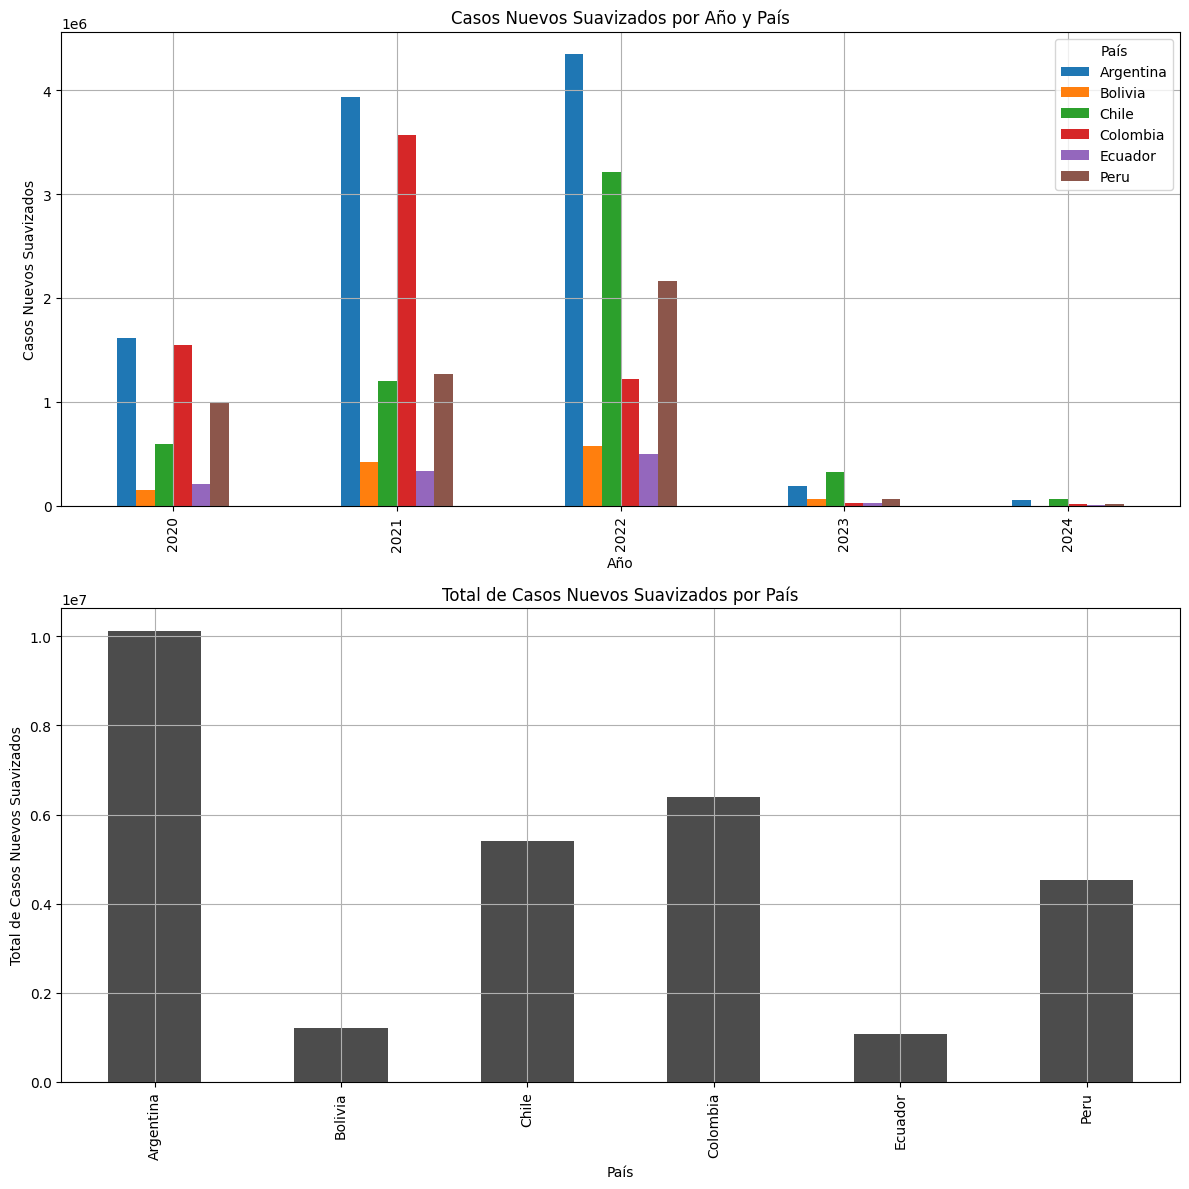

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que ya tienes el DataFrame `pivot_table` generado por tu código anterior

# Crear una figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Filtrar la fila 'Total' y guardarla en una variable separada
totals = pivot_table.loc['Total']

# Eliminar la fila 'Total' del DataFrame pivotado
pivot_table_without_total = pivot_table.drop(index='Total')

# Graficar las barras para cada año en el primer subgráfico
pivot_table_without_total.plot(kind='bar', ax=ax1)

# Graficar la barra total en el segundo subgráfico
totals.plot(kind='bar', ax=ax2, color='black', alpha=0.7)

# Personalizar el primer gráfico
ax1.set_title('Casos Nuevos Suavizados por Año y País')
ax1.set_xlabel('Año')
ax1.set_ylabel('Casos Nuevos Suavizados')
ax1.legend(title='País')
ax1.grid(True)

# Personalizar el segundo gráfico
ax2.set_title('Total de Casos Nuevos Suavizados por País')
ax2.set_xlabel('País')
ax2.set_ylabel('Total de Casos Nuevos Suavizados')
ax2.grid(True)

# Ajustar el diseño para evitar superposición de etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()
